# Experimento: Pregunta #1

Feedback hito 2: Ya vimos que popularidad no sirve de mucho, pero seria mejor analizar que atributos propios de la cancion (tempo, loudness, ...) si sirven. Abandonar popularidad y expandir clasificacion a quizas 10 atributos. La idea seria ver como Spotify genera ese valor de "af_valence"

La pregunta habia quedado asi en el hito-2:

- ¿Es posible predecir la positividad de una canción basándose en su popularidad y tempo?

In [8]:
# %pip install pandas
# %pip install openpyxl
# %pip install seaborn
# %pip install matplotlib --user
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
#El dataframe utilizado habia sido el siguiente:

#df_util_4 = df_spotify[["streams", "popularity", "af_tempo", "af_valence"]].copy()

In [10]:
#importamos el dataframe base:

df_spotify = pd.read_excel('../../Spotify.xlsx')

#Ajustamos columnas para contraarrestar error de formato en archivo xlsx
df_spotify['duration_ms'] = df_spotify['duration_ms']/10
df_spotify['popularity'] = df_spotify['popularity']/10
df_spotify['streams'] = df_spotify['streams']/10
df_spotify['af_danceability'] = df_spotify['af_danceability']/1000
df_spotify['af_energy'] = df_spotify['af_energy']/1000
df_spotify['af_key'] = df_spotify['af_key']/10
df_spotify['af_loudness'] = df_spotify['af_loudness']/1000
df_spotify['af_speechiness'] = df_spotify['af_speechiness']/1000
df_spotify['af_acousticness'] = df_spotify['af_acousticness']/1000
df_spotify['af_instrumentalness'] = df_spotify['af_instrumentalness']/1000
df_spotify['af_liveness'] = df_spotify['af_liveness']/1000
df_spotify['af_valence'] = df_spotify['af_valence']/1000
df_spotify['af_tempo'] = df_spotify['af_tempo']/1000
df_spotify['af_time_signature'] = df_spotify['af_time_signature']/10

Atributos propios de la cancion a conservar:

- duration_ms
- explicit
- af_danceability
- af_energy
- af_key
- af_loudness
- af_mode
- af_speechiness
- af_acousticness
- af_instrumentalness
- af_liveness
- af_valence
- af_tempo
- af_time_signature

In [11]:
#Partimos seleccionando todo atributo propio a la cancion

df_propios = df_spotify[["duration_ms", "explicit", "af_danceability", "af_energy", "af_key", "af_loudness", "af_mode", "af_speechiness", "af_acousticness", "af_instrumentalness", "af_liveness", "af_valence", "af_tempo", "af_time_signature"]].copy()

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

X = df_propios.drop(columns = 'af_valence')
y_reshaped = df_propios["af_valence"].values.reshape(-1,1) #Redimensionamos datos a matriz de una sola columna

#aplanamos datos transformados por discretizador y creamos serie de pandas.
#Las etiquetas discretizadas representan positividad en una escala del 0 al 9, siendo 0 poco positivo, y 9 mucho.
y = pd.Series(discretizer.fit_transform(y_reshaped).flatten(), name='af_valence', dtype=int) 

#Escalamos y normalizamos los datos del dataframe
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)

In [12]:
X_scaled

,duration_ms,explicit,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_tempo,af_time_signature
0,0.223272,-0.708129,-2.345716,-0.740317,1.487257,-1.676977,-1.086527,-0.472064,-1.226130,-0.371915,-0.729222,0.027485,0.072313
1,-1.624309,1.412173,-0.088171,0.483934,-1.217273,-0.031738,0.920363,-0.238680,-0.374582,-0.371916,-0.363745,1.497668,0.072313
2,0.178925,-0.708129,-0.108959,1.213180,0.946351,0.932100,0.920363,0.568275,-0.478617,-0.371916,-0.363745,1.487958,0.072313
3,-0.697248,1.412173,-2.270880,0.793311,1.487257,1.805701,0.920363,1.161624,-1.310900,-0.371876,-0.070733,-0.389899,0.072313
4,0.711734,-0.708129,0.676817,-0.161339,0.134992,-0.890772,-1.086527,-0.824117,2.087586,-0.371916,-0.785934,1.251108,0.072313
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009045,0.064672,-0.708129,0.797385,1.080590,1.487257,1.023404,-1.086527,0.054039,-0.632744,-0.371916,1.192684,0.606631,0.072313
1009046,1.434313,-0.708129,-2.416394,-0.899425,0.946351,-1.274105,0.920363,-0.448330,1.740801,-0.371916,-0.697716,0.433699,0.072313
1009047,0.640407,-0.708129,-0.408302,-0.351385,0.946351,-1.777162,-1.086527,0.057995,0.211098,-0.371890,-0.250321,-0.507165,0.072313
1009048,0.469563,-0.708129,0.427364,1.085010,-0.946820,0.751625,-1.086527,-1.373954,1.328514,-0.371916,-1.113604,-0.414047,0.072313


In [13]:
y

0          2
1          3
2          8
3          4
4          0
          ..
1009045    8
1009046    0
1009047    2
1009048    6
1009049    3
Name: af_valence, Length: 1009050, dtype: int64

## Reduccion de atributos

### Sin reducir atributos:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0, stratify=y)

In [8]:
#KNeighborsClassifier: GridSearch

tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejor combinación de parámetros:
{'n_neighbors': 6, 'weights': 'distance'}


In [61]:
kn_clf_13 = KNeighborsClassifier(n_neighbors=6, weights = 'distance', n_jobs = -1)

kn_clf_13.fit(X_train, y_train)

y_pred_list = []
y_pred_13 = kn_clf_13.predict(X_test)
y_pred_list.append(y_pred_13)

print(classification_report(y_test, y_pred_13))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_13, X_scaled, y, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(5))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(5))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(5))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28661
           1       1.00      1.00      1.00     11122
           2       1.00      1.00      1.00     21107
           3       1.00      1.00      1.00     38446
           4       1.00      1.00      1.00     35389
           5       1.00      1.00      1.00     49003
           6       1.00      1.00      1.00     42709
           7       1.00      1.00      1.00     35543
           8       1.00      1.00      1.00     26810
           9       1.00      1.00      1.00     13925

    accuracy                           1.00    302715
   macro avg       1.00      1.00      1.00    302715
weighted avg       1.00      1.00      1.00    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.98889
recall_macro promedio:  0.9887
accuracy promedio:  0.98969
f1_macro promedio:  0.98877


### Reduccion a 10 atributos:

#### K-best: 
- mutual_info_classifier

In [16]:
selector = SelectKBest(mutual_info_classif, k=10)

selector.fit(X_train, y_train)

X_train_selected_10 = pd.DataFrame(selector.transform(X_train), columns=X_scaled.columns[selector.get_support()])
X_test_selected_10 = pd.DataFrame(selector.transform(X_test), columns=X_scaled.columns[selector.get_support()])
X_scaled_selected_10 = pd.DataFrame(selector.transform(X_scaled), columns=X_scaled.columns[selector.get_support()])

In [17]:
X_train_selected_10

,duration_ms,af_danceability,af_energy,af_key,af_loudness,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_tempo
0,0.307309,0.261063,0.810990,-1.487726,0.746651,-0.025074,-0.652010,1.139941,1.564463,0.143778
1,-0.564884,-2.299983,0.541390,0.946351,1.818135,-0.143744,-0.170365,-0.371866,-0.174705,1.069160
2,0.614637,-0.146376,-2.357918,0.675898,-0.376346,0.065906,-0.532562,-0.371916,0.048992,1.504690
3,0.307309,0.261063,0.810990,-1.487726,0.746651,-0.025074,-0.652010,1.139941,1.564463,0.143778
4,1.674551,-2.607641,0.249691,1.216804,1.721503,-0.586778,1.105030,2.775721,-0.757578,-2.616425
...,...,...,...,...,...,...,...,...,...,...
706330,0.178669,0.805701,0.064065,0.134992,-0.285043,2.273164,1.259157,0.625662,-1.101001,-0.365125
706331,-0.293149,0.547933,-2.415374,1.487257,-0.572098,0.572231,1.833277,-0.371916,1.435285,-0.528834
706332,-2.202605,-0.038280,0.152458,1.216804,-1.681595,2.103071,-0.790723,-0.371916,1.643229,-0.357987
706333,-0.904873,0.560406,0.355763,-1.217273,-0.650257,0.168753,-0.139540,-0.371916,-1.113604,0.257429


In [12]:
#KNeighborsClassifier: GridSearch

tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_selected_10, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'n_neighbors': 13, 'weights': 'distance'}


In [62]:
kn_clf_10 = KNeighborsClassifier(n_neighbors=13, weights = 'distance', n_jobs = -1)

kn_clf_10.fit(X_train_selected_10, y_train)

y_pred_10 = kn_clf_10.predict(X_test_selected_10)
y_pred_list.append(y_pred_10)

print(classification_report(y_test, y_pred_10))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_10, X_scaled_selected_10, y, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(5))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(5))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(5))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28661
           1       1.00      1.00      1.00     11122
           2       1.00      1.00      1.00     21107
           3       1.00      1.00      1.00     38446
           4       1.00      1.00      1.00     35389
           5       1.00      1.00      1.00     49003
           6       1.00      1.00      1.00     42709
           7       1.00      1.00      1.00     35543
           8       1.00      1.00      1.00     26810
           9       1.00      1.00      1.00     13925

    accuracy                           1.00    302715
   macro avg       1.00      1.00      1.00    302715
weighted avg       1.00      1.00      1.00    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.98921
recall_macro promedio:  0.98864
accuracy promedio:  0.98964
f1_macro promedio:  0.9889


### Reduccion a 8 atributos:

#### K-best: 
- mutual_info_classifier

In [19]:
selector = SelectKBest(mutual_info_classif, k=8)

selector.fit(X_train, y_train)

X_train_selected_8 = pd.DataFrame(selector.transform(X_train), columns=X_scaled.columns[selector.get_support()])
X_test_selected_8 = pd.DataFrame(selector.transform(X_test), columns=X_scaled.columns[selector.get_support()])
X_scaled_selected_8 = pd.DataFrame(selector.transform(X_scaled), columns=X_scaled.columns[selector.get_support()])

In [20]:
X_train_selected_8

,duration_ms,af_danceability,af_energy,af_loudness,af_speechiness,af_acousticness,af_liveness,af_tempo
0,0.307309,0.261063,0.810990,0.746651,-0.025074,-0.652010,1.564463,0.143778
1,-0.564884,-2.299983,0.541390,1.818135,-0.143744,-0.170365,-0.174705,1.069160
2,0.614637,-0.146376,-2.357918,-0.376346,0.065906,-0.532562,0.048992,1.504690
3,0.307309,0.261063,0.810990,0.746651,-0.025074,-0.652010,1.564463,0.143778
4,1.674551,-2.607641,0.249691,1.721503,-0.586778,1.105030,-0.757578,-2.616425
...,...,...,...,...,...,...,...,...
706330,0.178669,0.805701,0.064065,-0.285043,2.273164,1.259157,-1.101001,-0.365125
706331,-0.293149,0.547933,-2.415374,-0.572098,0.572231,1.833277,1.435285,-0.528834
706332,-2.202605,-0.038280,0.152458,-1.681595,2.103071,-0.790723,1.643229,-0.357987
706333,-0.904873,0.560406,0.355763,-0.650257,0.168753,-0.139540,-1.113604,0.257429


In [16]:
#KNeighborsClassifier: GridSearch

tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_selected_8, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'n_neighbors': 5, 'weights': 'distance'}


In [63]:
kn_clf_8 = KNeighborsClassifier(n_neighbors=5, weights = 'distance', n_jobs = -1)

kn_clf_8.fit(X_train_selected_8, y_train)

y_pred_8 = kn_clf_8.predict(X_test_selected_8)
y_pred_list.append(y_pred_8)

print(classification_report(y_test, y_pred_8))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_8, X_scaled_selected_8, y, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(5))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(5))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(5))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28661
           1       1.00      1.00      1.00     11122
           2       1.00      1.00      1.00     21107
           3       1.00      1.00      1.00     38446
           4       1.00      1.00      1.00     35389
           5       1.00      1.00      1.00     49003
           6       1.00      1.00      1.00     42709
           7       1.00      1.00      1.00     35543
           8       1.00      1.00      1.00     26810
           9       1.00      1.00      1.00     13925

    accuracy                           1.00    302715
   macro avg       1.00      1.00      1.00    302715
weighted avg       1.00      1.00      1.00    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.98854
recall_macro promedio:  0.9885
accuracy promedio:  0.9895
f1_macro promedio:  0.98849


### Reduccion a 6 atributos:

#### K-best: 
- mutual_info_classifier

In [22]:
selector = SelectKBest(mutual_info_classif, k=6)

selector.fit(X_train, y_train)

X_train_selected_6 = pd.DataFrame(selector.transform(X_train), columns=X_scaled.columns[selector.get_support()])
X_test_selected_6 = pd.DataFrame(selector.transform(X_test), columns=X_scaled.columns[selector.get_support()])
X_scaled_selected_6 = pd.DataFrame(selector.transform(X_scaled), columns=X_scaled.columns[selector.get_support()])

In [23]:
X_train_selected_6

,duration_ms,af_energy,af_loudness,af_speechiness,af_acousticness,af_tempo
0,0.307309,0.810990,0.746651,-0.025074,-0.652010,0.143778
1,-0.564884,0.541390,1.818135,-0.143744,-0.170365,1.069160
2,0.614637,-2.357918,-0.376346,0.065906,-0.532562,1.504690
3,0.307309,0.810990,0.746651,-0.025074,-0.652010,0.143778
4,1.674551,0.249691,1.721503,-0.586778,1.105030,-2.616425
...,...,...,...,...,...,...
706330,0.178669,0.064065,-0.285043,2.273164,1.259157,-0.365125
706331,-0.293149,-2.415374,-0.572098,0.572231,1.833277,-0.528834
706332,-2.202605,0.152458,-1.681595,2.103071,-0.790723,-0.357987
706333,-0.904873,0.355763,-0.650257,0.168753,-0.139540,0.257429


In [22]:
#KNeighborsClassifier: GridSearch

tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_selected_6, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'n_neighbors': 14, 'weights': 'distance'}


In [64]:
kn_clf_6 = KNeighborsClassifier(n_neighbors=14, weights = 'distance', n_jobs = -1)

kn_clf_6.fit(X_train_selected_6, y_train)

y_pred_6 = kn_clf_6.predict(X_test_selected_6)
y_pred_list.append(y_pred_6)

print(classification_report(y_test, y_pred_6))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_6, X_scaled_selected_6, y, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(5))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(5))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(5))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28661
           1       1.00      1.00      1.00     11122
           2       1.00      1.00      1.00     21107
           3       1.00      1.00      1.00     38446
           4       1.00      1.00      1.00     35389
           5       1.00      1.00      1.00     49003
           6       1.00      1.00      1.00     42709
           7       1.00      1.00      1.00     35543
           8       1.00      1.00      1.00     26810
           9       1.00      1.00      1.00     13925

    accuracy                           1.00    302715
   macro avg       1.00      1.00      1.00    302715
weighted avg       1.00      1.00      1.00    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.98854
recall_macro promedio:  0.98821
accuracy promedio:  0.98922
f1_macro promedio:  0.98836


### Reduccion a 4 atributos:

#### K-best: 
- mutual_info_classifier

In [25]:
selector = SelectKBest(mutual_info_classif, k=4)

selector.fit(X_train, y_train)

X_train_selected_4 = pd.DataFrame(selector.transform(X_train), columns=X_scaled.columns[selector.get_support()])
X_test_selected_4 = pd.DataFrame(selector.transform(X_test), columns=X_scaled.columns[selector.get_support()])
X_scaled_selected_4 = pd.DataFrame(selector.transform(X_scaled), columns=X_scaled.columns[selector.get_support()])

In [27]:
X_train_selected_4

,duration_ms,af_loudness,af_speechiness,af_tempo
0,0.307309,0.746651,-0.025074,0.143778
1,-0.564884,1.818135,-0.143744,1.069160
2,0.614637,-0.376346,0.065906,1.504690
3,0.307309,0.746651,-0.025074,0.143778
4,1.674551,1.721503,-0.586778,-2.616425
...,...,...,...,...
706330,0.178669,-0.285043,2.273164,-0.365125
706331,-0.293149,-0.572098,0.572231,-0.528834
706332,-2.202605,-1.681595,2.103071,-0.357987
706333,-0.904873,-0.650257,0.168753,0.257429


In [26]:
#KNeighborsClassifier: GridSearch

tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_selected_4, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'n_neighbors': 3, 'weights': 'distance'}


In [65]:
kn_clf_4 = KNeighborsClassifier(n_neighbors=3, weights = 'distance', n_jobs = -1)

kn_clf_4.fit(X_train_selected_4, y_train)

y_pred_4 = kn_clf_4.predict(X_test_selected_4)
y_pred_list.append(y_pred_4)

print(classification_report(y_test, y_pred_4))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_4, X_scaled_selected_4, y, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(5))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(5))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(5))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28661
           1       1.00      1.00      1.00     11122
           2       1.00      1.00      1.00     21107
           3       1.00      1.00      1.00     38446
           4       1.00      1.00      1.00     35389
           5       1.00      1.00      1.00     49003
           6       1.00      1.00      1.00     42709
           7       1.00      1.00      1.00     35543
           8       1.00      1.00      1.00     26810
           9       1.00      1.00      1.00     13925

    accuracy                           1.00    302715
   macro avg       1.00      1.00      1.00    302715
weighted avg       1.00      1.00      1.00    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.98914
recall_macro promedio:  0.98892
accuracy promedio:  0.98969
f1_macro promedio:  0.98901


### Reduccion a 3 atributos:

#### K-best: 
- mutual_info_classifier

In [29]:
selector = SelectKBest(mutual_info_classif, k=3)

selector.fit(X_train, y_train)

X_train_selected_3 = pd.DataFrame(selector.transform(X_train), columns=X_scaled.columns[selector.get_support()])
X_test_selected_3 = pd.DataFrame(selector.transform(X_test), columns=X_scaled.columns[selector.get_support()])
X_scaled_selected_3 = pd.DataFrame(selector.transform(X_scaled), columns=X_scaled.columns[selector.get_support()])

In [30]:
X_train_selected_3

,duration_ms,af_loudness,af_tempo
0,0.307309,0.746651,0.143778
1,-0.564884,1.818135,1.069160
2,0.614637,-0.376346,1.504690
3,0.307309,0.746651,0.143778
4,1.674551,1.721503,-2.616425
...,...,...,...
706330,0.178669,-0.285043,-0.365125
706331,-0.293149,-0.572098,-0.528834
706332,-2.202605,-1.681595,-0.357987
706333,-0.904873,-0.650257,0.257429


In [30]:
#KNeighborsClassifier: GridSearch

tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_selected_3, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'n_neighbors': 6, 'weights': 'distance'}


In [66]:
kn_clf_3 = KNeighborsClassifier(n_neighbors=6, weights = 'distance', n_jobs = -1)

kn_clf_3.fit(X_train_selected_3, y_train)

y_pred_3 = kn_clf_3.predict(X_test_selected_3)
y_pred_list.append(y_pred_3)

print(classification_report(y_test, y_pred_3))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_3, X_scaled_selected_3, y, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(5))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(5))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(5))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28661
           1       1.00      1.00      1.00     11122
           2       1.00      1.00      1.00     21107
           3       1.00      1.00      1.00     38446
           4       1.00      1.00      1.00     35389
           5       1.00      1.00      1.00     49003
           6       1.00      1.00      1.00     42709
           7       1.00      1.00      1.00     35543
           8       1.00      1.00      1.00     26810
           9       1.00      1.00      1.00     13925

    accuracy                           1.00    302715
   macro avg       1.00      1.00      1.00    302715
weighted avg       1.00      1.00      1.00    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.9893
recall_macro promedio:  0.98885
accuracy promedio:  0.98968
f1_macro promedio:  0.98906


### Reduccion a 2 atributos:

#### K-best: 
- mutual_info_classifier

In [32]:
selector = SelectKBest(mutual_info_classif, k=2)

selector.fit(X_train, y_train)

X_train_selected_2 = pd.DataFrame(selector.transform(X_train), columns=X_scaled.columns[selector.get_support()])
X_test_selected_2 = pd.DataFrame(selector.transform(X_test), columns=X_scaled.columns[selector.get_support()])
X_scaled_selected_2 = pd.DataFrame(selector.transform(X_scaled), columns=X_scaled.columns[selector.get_support()])

In [33]:
X_train_selected_2

,duration_ms,af_tempo
0,0.307309,0.143778
1,-0.564884,1.069160
2,0.614637,1.504690
3,0.307309,0.143778
4,1.674551,-2.616425
...,...,...
706330,0.178669,-0.365125
706331,-0.293149,-0.528834
706332,-2.202605,-0.357987
706333,-0.904873,0.257429


In [34]:
#KNeighborsClassifier: GridSearch

tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_selected_2, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'n_neighbors': 7, 'weights': 'distance'}


In [67]:
kn_clf_2 = KNeighborsClassifier(n_neighbors=7, weights = 'distance', n_jobs = -1)

kn_clf_2.fit(X_train_selected_2, y_train)

y_pred_2 = kn_clf_2.predict(X_test_selected_2)
y_pred_list.append(y_pred_2)

print(classification_report(y_test, y_pred_2))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_2, X_scaled_selected_2, y, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(5))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(5))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(5))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28661
           1       1.00      1.00      1.00     11122
           2       1.00      1.00      1.00     21107
           3       1.00      1.00      1.00     38446
           4       1.00      1.00      1.00     35389
           5       1.00      1.00      1.00     49003
           6       1.00      1.00      1.00     42709
           7       1.00      1.00      1.00     35543
           8       1.00      1.00      1.00     26810
           9       1.00      1.00      1.00     13925

    accuracy                           1.00    302715
   macro avg       1.00      1.00      1.00    302715
weighted avg       1.00      1.00      1.00    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.98864
recall_macro promedio:  0.98899
accuracy promedio:  0.98965
f1_macro promedio:  0.9888


### Reduccion a 1 atributo:

#### K-best: 
- mutual_info_classifier

In [35]:
selector = SelectKBest(mutual_info_classif, k=1)

selector.fit(X_train, y_train)

X_train_selected_1 = pd.DataFrame(selector.transform(X_train), columns=X_scaled.columns[selector.get_support()])
X_test_selected_1 = pd.DataFrame(selector.transform(X_test), columns=X_scaled.columns[selector.get_support()])
X_scaled_selected_1 = pd.DataFrame(selector.transform(X_scaled), columns=X_scaled.columns[selector.get_support()])

In [36]:
X_train_selected_1

,duration_ms
0,0.307309
1,-0.564884
2,0.614637
3,0.307309
4,1.674551
...,...
706330,0.178669
706331,-0.293149
706332,-2.202605
706333,-0.904873


In [38]:
#KNeighborsClassifier: GridSearch

tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_selected_1, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'n_neighbors': 15, 'weights': 'distance'}


In [68]:
kn_clf_1 = KNeighborsClassifier(n_neighbors=15, weights = 'distance', n_jobs = -1)

kn_clf_1.fit(X_train_selected_1, y_train)

y_pred_1 = kn_clf_1.predict(X_test_selected_1)
y_pred_list.append(y_pred_1)

print(classification_report(y_test, y_pred_1))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_1, X_scaled_selected_1, y, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(5))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(5))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(5))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(5))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     28661
           1       0.97      0.96      0.97     11122
           2       0.96      0.97      0.97     21107
           3       0.97      0.98      0.98     38446
           4       0.98      0.97      0.98     35389
           5       0.97      0.98      0.97     49003
           6       0.98      0.97      0.98     42709
           7       0.98      0.98      0.98     35543
           8       0.98      0.99      0.98     26810
           9       0.99      0.98      0.98     13925

    accuracy                           0.98    302715
   macro avg       0.98      0.97      0.97    302715
weighted avg       0.98      0.98      0.98    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.94919
recall_macro promedio:  0.95026
accuracy promedio:  0.95181
f1_macro promedio:  0.94941


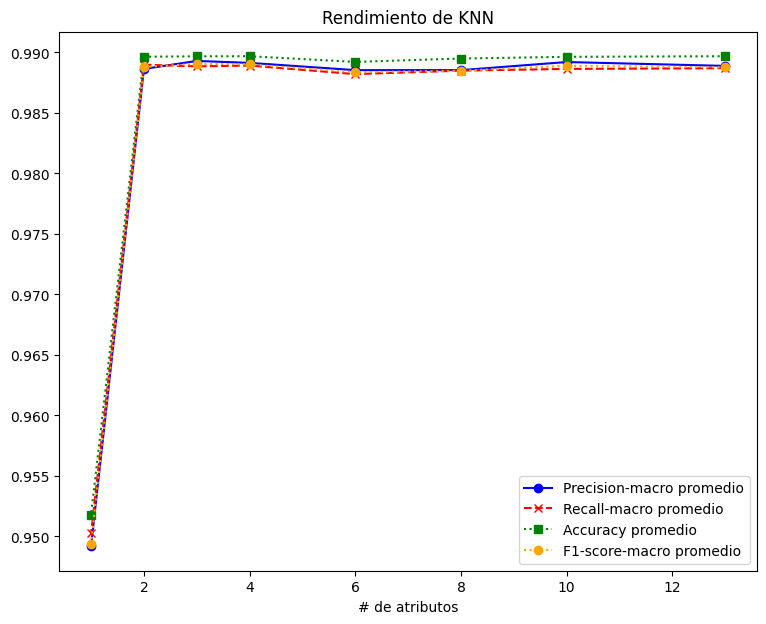

In [56]:
plt.rcParams['figure.figsize'] = [9, 7]

x = [13, 10, 8, 6, 4, 3, 2, 1]
y_prec = [0.98889, 0.98921, 0.98854, 0.98854, 0.98914, 0.9893, 0.98864, 0.94919]  
y_rec = [0.9887, 0.98864, 0.9885, 0.98821, 0.98892, 0.98885, 0.98899, 0.95026]    
y_acc = [0.98969, 0.98964, 0.9895, 0.98922, 0.98969, 0.98968, 0.98965, 0.95181]  
y_f1 = [0.98877, 0.9889, 0.98849, 0.98836, 0.98901, 0.98906, 0.9888, 0.94941]

plt.plot(x, y_prec, label="Precision-macro promedio", color="blue", linestyle='-', marker='o') 
plt.plot(x, y_rec, label="Recall-macro promedio", color="red", linestyle='--', marker='x')  
plt.plot(x, y_acc, label="Accuracy promedio", color="green", linestyle=':', marker='s') 
plt.plot(x, y_f1, label="F1-score-macro promedio", color="orange", linestyle=':', marker='o')  

plt.xlabel("# de atributos")
plt.title("Rendimiento de KNN")

plt.legend()

plt.show()

In [71]:
y_pred_list

[array([0, 8, 0, ..., 5, 8, 2]),
 array([0, 8, 0, ..., 5, 8, 2]),
 array([0, 8, 0, ..., 5, 8, 2]),
 array([0, 8, 0, ..., 5, 8, 2]),
 array([0, 8, 0, ..., 5, 8, 2]),
 array([0, 8, 0, ..., 5, 8, 2]),
 array([0, 8, 0, ..., 5, 8, 2]),
 array([0, 8, 0, ..., 5, 8, 2])]

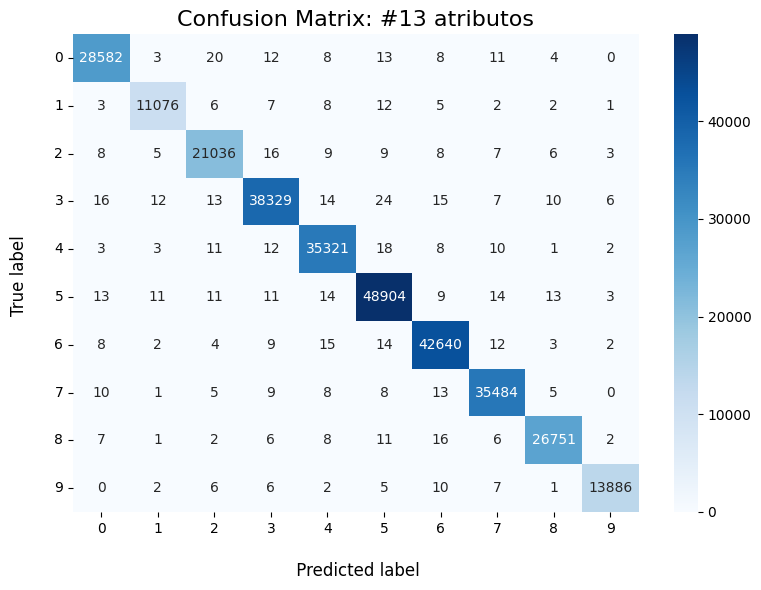

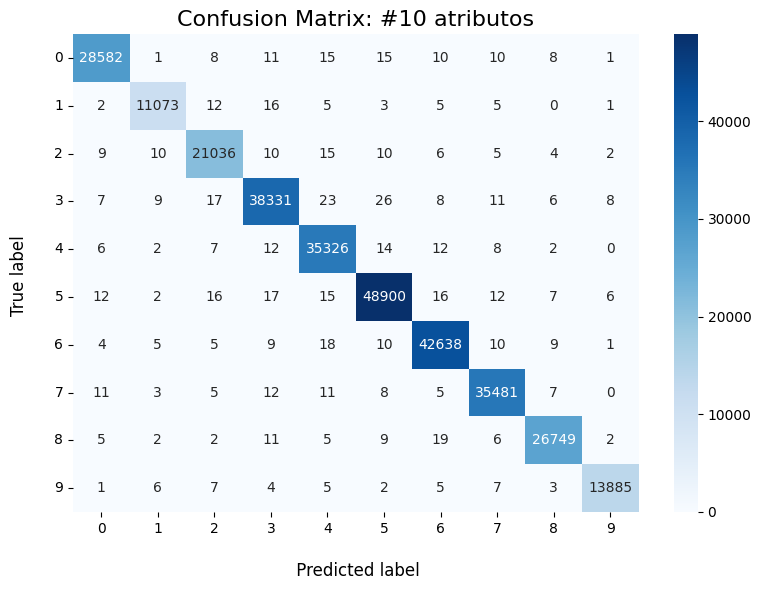

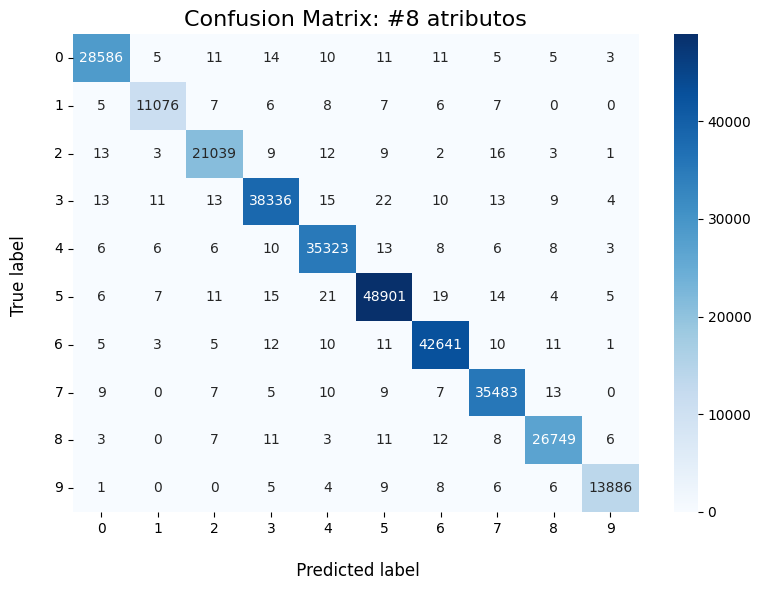

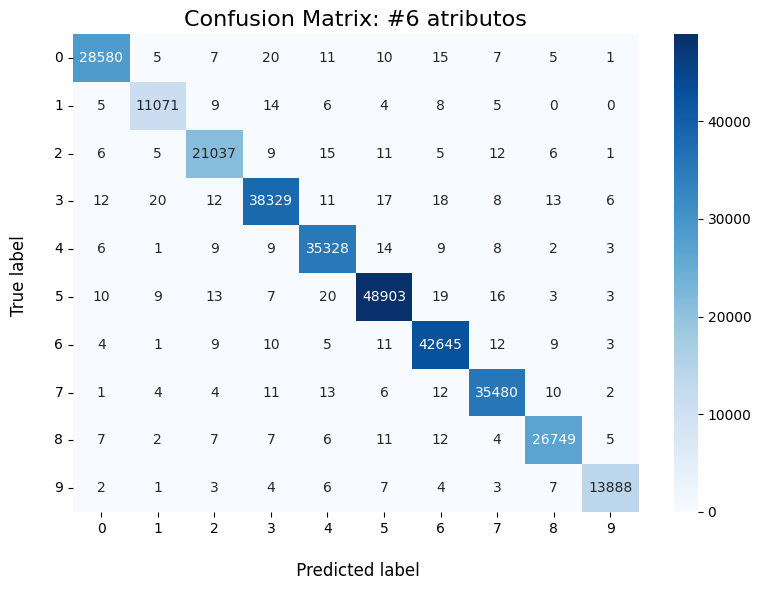

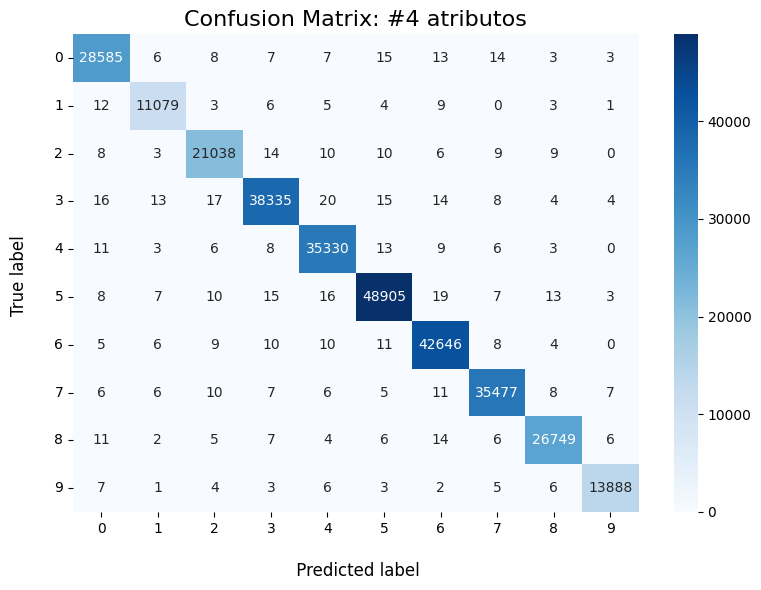

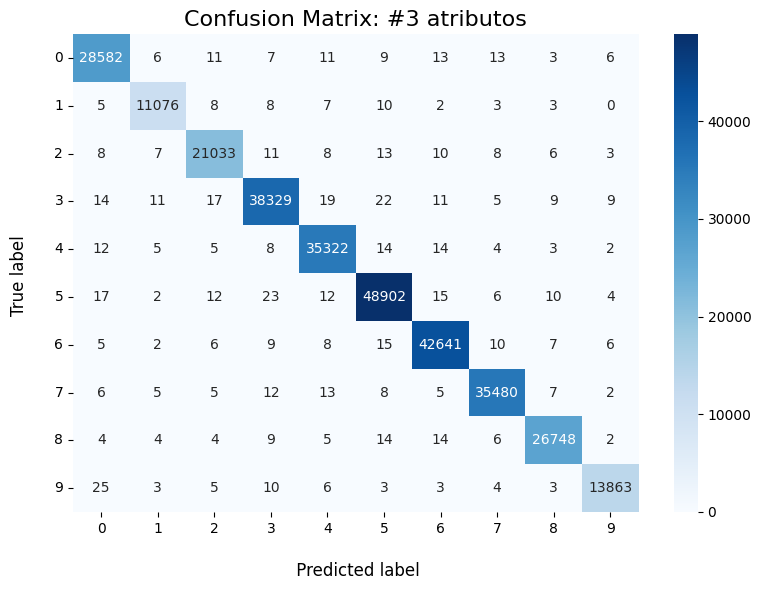

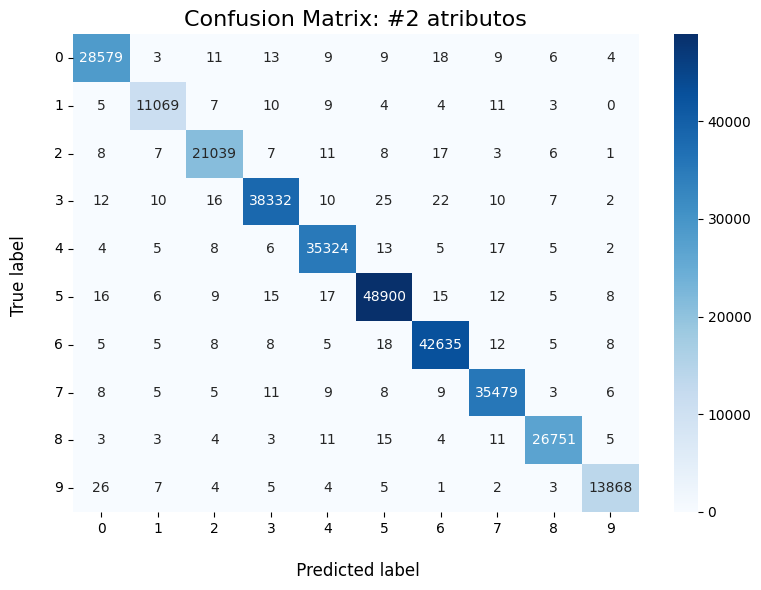

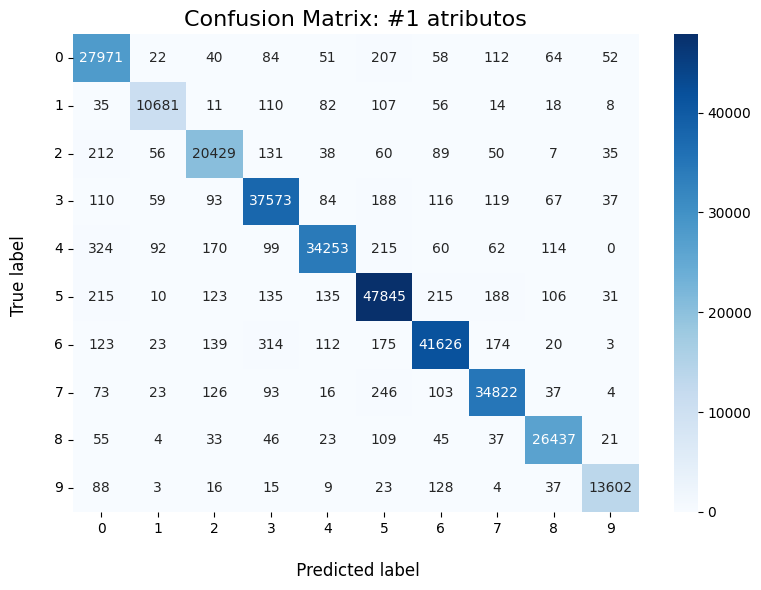

In [78]:
elements = [13, 10, 8, 6, 4, 3, 2, 1]

for i in range(0, 8):
    y_pred = y_pred_list[i]
    
    # Crear la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Configurar el gráfico
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax)

    # Personalizar el título y los ejes
    ax.set_title('Confusion Matrix: ' + '#' + str(elements[i]) + ' atributos' , fontsize=16)
    ax.set_xlabel('\n Predicted label', fontsize=12)
    ax.set_ylabel('True label \n', fontsize=12)

    plt.xticks(fontsize=10, rotation=0)
    plt.yticks(fontsize=10, rotation=0)

    plt.tight_layout()
    plt.show()